# Spark session

In [1]:
from pyspark.sql import SparkSession


In [2]:
spark = SparkSession.builder\
                    .appName("Analyzing London crime data")\
                    .getOrCreate()

In [3]:
# read

In [4]:
data =spark.read\
            .format("csv")\
            .option("header", "true")\
            .load("/data/pluralsight_spark2/02/demos/datasets/london_crime_by_lsoa.csv")

In [5]:
data.printSchema()

root
 |-- lsoa_code: string (nullable = true)
 |-- borough: string (nullable = true)
 |-- major_category: string (nullable = true)
 |-- minor_category: string (nullable = true)
 |-- value: string (nullable = true)
 |-- year: string (nullable = true)
 |-- month: string (nullable = true)



In [6]:
data.count()

13490604

In [7]:
data.limit(5).show()

+---------+----------+--------------------+--------------------+-----+----+-----+
|lsoa_code|   borough|      major_category|      minor_category|value|year|month|
+---------+----------+--------------------+--------------------+-----+----+-----+
|E01001116|   Croydon|            Burglary|Burglary in Other...|    0|2016|   11|
|E01001646| Greenwich|Violence Against ...|      Other violence|    0|2016|   11|
|E01000677|   Bromley|Violence Against ...|      Other violence|    0|2015|    5|
|E01003774| Redbridge|            Burglary|Burglary in Other...|    0|2016|    3|
|E01004563|Wandsworth|             Robbery|   Personal Property|    0|2008|    6|
+---------+----------+--------------------+--------------------+-----+----+-----+



In [8]:
data.dropna()

DataFrame[lsoa_code: string, borough: string, major_category: string, minor_category: string, value: string, year: string, month: string]

In [9]:
data = data.drop("lsoa_code")
data.show()

+--------------------+--------------------+--------------------+-----+----+-----+
|             borough|      major_category|      minor_category|value|year|month|
+--------------------+--------------------+--------------------+-----+----+-----+
|             Croydon|            Burglary|Burglary in Other...|    0|2016|   11|
|           Greenwich|Violence Against ...|      Other violence|    0|2016|   11|
|             Bromley|Violence Against ...|      Other violence|    0|2015|    5|
|           Redbridge|            Burglary|Burglary in Other...|    0|2016|    3|
|          Wandsworth|             Robbery|   Personal Property|    0|2008|    6|
|              Ealing|  Theft and Handling|         Other Theft|    0|2012|    5|
|              Ealing|Violence Against ...|    Offensive Weapon|    0|2010|    7|
|            Hounslow|             Robbery|   Personal Property|    0|2013|    4|
|              Newham|     Criminal Damage|Criminal Damage T...|    0|2013|    9|
|              S

In [10]:
total_boroughs = data.select('borough')\
                        .distinct()
total_boroughs.show()

+--------------------+
|             borough|
+--------------------+
|             Croydon|
|          Wandsworth|
|              Bexley|
|             Lambeth|
|Barking and Dagenham|
|              Camden|
|           Greenwich|
|              Newham|
|       Tower Hamlets|
|            Hounslow|
|              Barnet|
|              Harrow|
|Kensington and Ch...|
|           Islington|
|               Brent|
|            Haringey|
|             Bromley|
|              Merton|
|         Westminster|
|             Hackney|
+--------------------+
only showing top 20 rows



In [11]:
total_boroughs.count()

33

In [12]:
#Filters

In [13]:
hackney_data = data.filter(data['borough'] == "Hackney")
hackney_data.show()

+-------+--------------------+--------------------+-----+----+-----+
|borough|      major_category|      minor_category|value|year|month|
+-------+--------------------+--------------------+-----+----+-----+
|Hackney|     Criminal Damage|Criminal Damage T...|    0|2011|    6|
|Hackney|Violence Against ...|          Harassment|    1|2013|    2|
|Hackney|     Criminal Damage|Other Criminal Da...|    0|2011|    7|
|Hackney|Violence Against ...|        Wounding/GBH|    0|2013|   12|
|Hackney|  Theft and Handling|  Other Theft Person|    0|2016|    8|
|Hackney|            Burglary|Burglary in a Dwe...|    2|2008|    5|
|Hackney|             Robbery|   Business Property|    0|2016|    7|
|Hackney|  Theft and Handling|Theft/Taking of P...|    0|2009|   12|
|Hackney|               Drugs|    Drug Trafficking|    0|2014|    4|
|Hackney|  Theft and Handling|Handling Stolen G...|    0|2014|    6|
|Hackney|            Burglary|Burglary in Other...|    0|2008|   12|
|Hackney|Violence Against ...| Ass

# isin filter

In [14]:
data_2015_2016 = data.filter(data['year'].isin(["2015", "2016"]))
data_2015_2016.sample(fraction=0.1).show()

+--------------------+--------------------+--------------------+-----+----+-----+
|             borough|      major_category|      minor_category|value|year|month|
+--------------------+--------------------+--------------------+-----+----+-----+
|           Redbridge|            Burglary|Burglary in Other...|    0|2016|    3|
|Kingston upon Thames|  Theft and Handling|    Theft From Shops|    0|2016|   11|
|           Islington|  Theft and Handling|Theft/Taking Of M...|    0|2016|    6|
|Kensington and Ch...|Other Notifiable ...|    Other Notifiable|    0|2015|    5|
|           Redbridge|Violence Against ...| Assault with Injury|    2|2015|   12|
|       Tower Hamlets|             Robbery|   Personal Property|    0|2016|   10|
|              Bexley|Violence Against ...| Assault with Injury|    1|2015|    6|
|           Islington|            Burglary|Burglary in Other...|    1|2016|    7|
|Kensington and Ch...|  Theft and Handling|         Other Theft|    7|2016|    1|
|          Wands

In [15]:
data_2014_onwards = data.filter(data['year'] >= 2014)
data_2014_onwards.sample(fraction=0.1).show()

+--------------------+--------------------+--------------------+-----+----+-----+
|             borough|      major_category|      minor_category|value|year|month|
+--------------------+--------------------+--------------------+-----+----+-----+
|              Sutton|  Theft and Handling|Theft/Taking of P...|    1|2016|    8|
|              Barnet|Violence Against ...|      Other violence|    0|2015|   12|
|            Havering|            Burglary|Burglary in a Dwe...|    1|2016|    8|
|             Croydon|  Theft and Handling|  Other Theft Person|    0|2015|    3|
|         Westminster|  Theft and Handling|  Other Theft Person|    0|2015|   10|
|             Hackney|               Drugs|    Drug Trafficking|    0|2014|    4|
|           Redbridge|               Drugs| Possession Of Drugs|    2|2016|   11|
|       Tower Hamlets|             Robbery|   Personal Property|    0|2016|   10|
|Richmond upon Thames|Violence Against ...|      Common Assault|    0|2015|    3|
|Hammersmith and

In [17]:
crimes_category = data.groupBy('major_category')\
                        .agg({"value":"sum"})\
                        .withColumnRenamed("sum(value)", "convictions")

In [18]:
crimes_category.orderBy(crimes_category.convictions.desc()).show()

+--------------------+-----------+
|      major_category|convictions|
+--------------------+-----------+
|  Theft and Handling|  2661861.0|
|Violence Against ...|  1558081.0|
|            Burglary|   754293.0|
|     Criminal Damage|   630938.0|
|               Drugs|   470765.0|
|             Robbery|   258873.0|
|Other Notifiable ...|   106349.0|
|    Fraud or Forgery|     5325.0|
|     Sexual Offences|     1273.0|
+--------------------+-----------+



In [19]:
year_df = data.select('year')

In [26]:
year_df.agg({"year":'min'}).show()

+---------+
|min(year)|
+---------+
|     2008|
+---------+



In [28]:
year_df.agg({"year":'max'}).show()

+---------+
|max(year)|
+---------+
|     2016|
+---------+



In [29]:
year_df.describe().show()

+-------+-----------------+
|summary|             year|
+-------+-----------------+
|  count|         13490604|
|   mean|           2012.0|
| stddev|2.581988993167432|
|    min|             2008|
|    max|             2016|
+-------+-----------------+



In [30]:
data.crosstab('borough', 'major_category')\
    .select('borough_major_category', 'Burglary', 'Drugs', 'Fraud or Forgery', 'Robbery')\
    .show()

+----------------------+--------+-----+----------------+-------+
|borough_major_category|Burglary|Drugs|Fraud or Forgery|Robbery|
+----------------------+--------+-----+----------------+-------+
|              Havering|   32400|32616|            5508|  27648|
|                Merton|   26784|29160|            5724|  23652|
|              Haringey|   31320|35424|           10368|  29484|
|         Tower Hamlets|   31104|37368|            5400|  28512|
|               Bromley|   42552|42336|            8532|  34668|
|               Enfield|   39528|44064|            9720|  35532|
|  Kingston upon Thames|   21168|22140|            3780|  15660|
|           Westminster|   27648|32616|            8748|  25056|
|  Richmond upon Thames|   24840|23004|            2808|  18468|
|              Lewisham|   36504|43740|           11016|  34884|
|                 Brent|   37368|46980|            9288|  34128|
|  Barking and Dagenham|   23760|26244|            7236|  22248|
|             Redbridge| 

In [31]:
categories = data.select('major_category')\
                        .distinct()
categories.show()

+--------------------+
|      major_category|
+--------------------+
|               Drugs|
|             Robbery|
|  Theft and Handling|
|    Fraud or Forgery|
|Violence Against ...|
|            Burglary|
|Other Notifiable ...|
|     Sexual Offences|
|     Criminal Damage|
+--------------------+



In [ ]:
## Visualize


In [32]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [35]:
def describe_year(year):
    yearly_details = data.filter(data.year == year)\
                    .groupBy('borough')\
                    .agg({'value':'sum'})\
                    .withColumnRenamed("sum(value)", "convictions")
    
    borough_list = [x[0] for x in yearly_details.toLocalIterator()]
    
    convictions_list = [x[1] for x in yearly_details.toLocalIterator()]
    
    plt.figure(figsize=(33, 10))
    plt.bar(borough_list, convictions_list)
    
    plt.title('Crime for the year: ' + year, fontsize=30)
    plt.xlabel('Boroughs', fontsize=30)
    plt.ylabel('Convictions', fontsize=30)
    
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(fontsize=30)
    plt.autoscale()
    plt.show

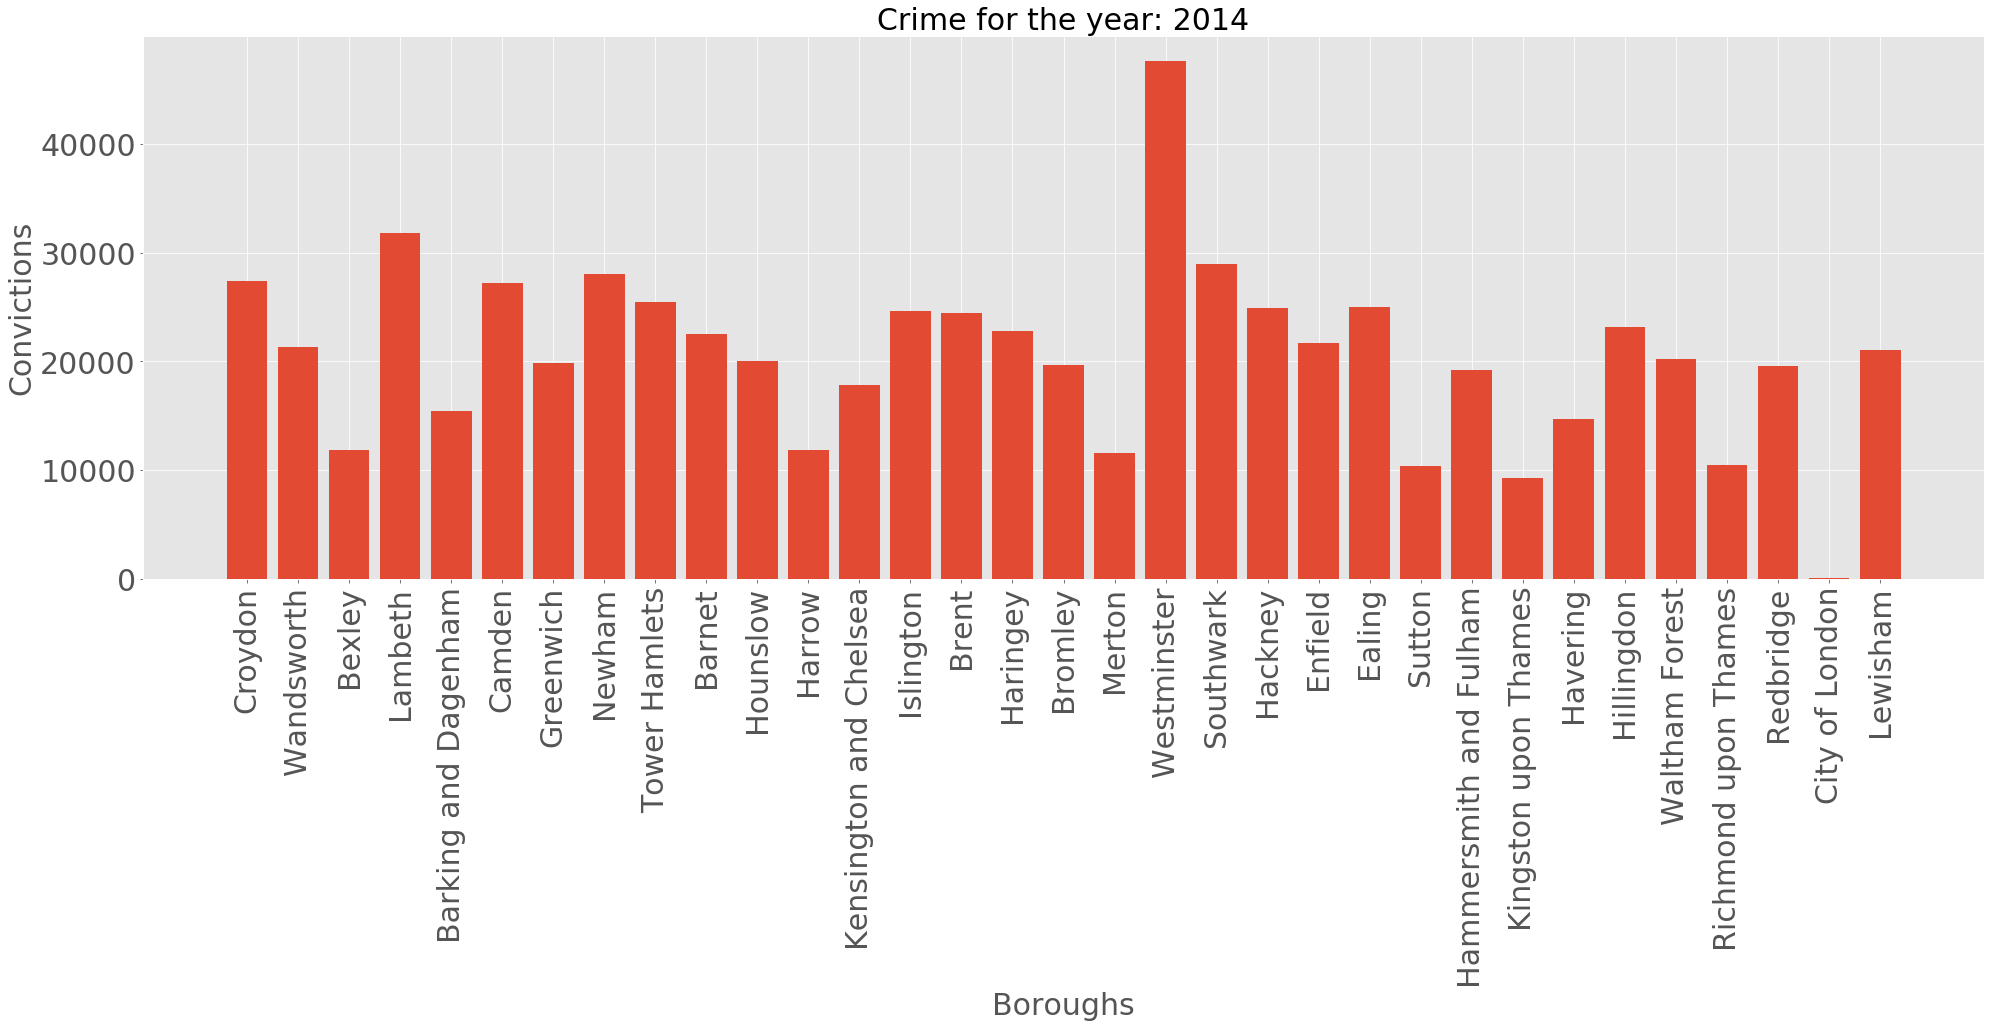

In [36]:
describe_year('2014')